In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
densely_dashdotted = (0, (3, 1, 1, 1))

orig_colors = sns.color_palette("pastel")
orig_colors1 = sns.color_palette("colorblind")

recmp_swap_thrpt_colors = [
    orig_colors1[7],
    orig_colors1[4],
]

recmp_swap_util_colors1 = [
    orig_colors1[7],
    orig_colors1[4],
    orig_colors1[2], 
]

densely_dashdotted = (0, (3, 1, 1, 1))
long_dash_with_offset = (5, (10, 3))
line_styles = ['solid', 'dashed', 'dashdot', densely_dashdotted, long_dash_with_offset, 'dotted']

base_plots_path = "./plots/recmp_swap_util/"
base_data_path = "./util_csv_recmp_swap/"

os.makedirs(base_plots_path, exist_ok=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Plotting ./util_csv_recmp_swap//Q4_e_g50/swap_Q4e_gpu50.csv


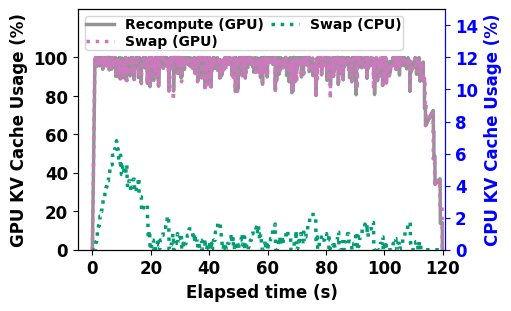

In [4]:
###### Plot for recomp/swap avg throughput (tokens/s) and GPU/CPU KV cache usage (%) over time ######
def plot_recmp_swap_for_avai_mem_case(data_recmp, data_swap, x_tag, y1_tag, y2_tag, output_name):
    fig, ax1 = plt.subplots(figsize=(5, 3), constrained_layout=True)
    # Plot the recompute and swap throughput on left y-axis
    ax1.plot(data_recmp[x_tag], data_recmp[y1_tag], color=recmp_swap_util_colors1[0], linewidth=2, label='Recompute (GPU)')
    ax1.plot(data_swap[x_tag], data_swap[y1_tag], color=recmp_swap_util_colors1[1], linestyle=':', linewidth=2, label='Swap (GPU)')

    ax2 = ax1.twinx()
    ax2.plot(data_swap[x_tag], data_swap[y2_tag], color=recmp_swap_util_colors1[2], linestyle=':', linewidth=2, label='Swap (CPU)')

    ax1.set_ylim(0, 125)  # outliers only
    ax1.set_yticks(range(0, 120, 20))  # most of the data

    ax2.set_ylim(0, 15)  # outliers only
    ax2.set_yticks(range(0, 15, 2))  # most of the data
    ax2.tick_params(axis='y', color='blue', labelcolor='blue')
    ax2.spines['right'].set_color('blue')

    ax1.set_xlim(-5, max(data_swap[x_tag].max(), data_recmp[x_tag].max()) + 1)
    ax1.set_xticks(range(0, int(max(data_swap[x_tag].max(), data_recmp[x_tag].max()) + 5), 20))

    ax1.set_ylabel('GPU KV Cache Usage (%)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('CPU KV Cache Usage (%)', fontsize=12, fontweight='bold', color='blue')
    ax1.set_xlabel('Elapsed time (s)', fontsize=12, fontweight='bold')

    linewidth=2.5
    lines1, labels1 = ax1.get_legend_handles_labels()
    for line in lines1:
        line.set_linewidth(linewidth)
    lines2, labels2 = ax2.get_legend_handles_labels()
    for line in lines2:
        line.set_linewidth(linewidth)

    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', ncol=2, borderpad=0.1, 
            labelspacing=0.2, columnspacing=0.5, frameon=True, fontsize=10, handlelength=2)

    plt.savefig(f"{output_name}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_name}.png", format='png', bbox_inches='tight')
    plt.show()

output_name = f'{base_plots_path}/swap-recmp-util-q4e-g50'
filename_swap = f'{base_data_path}/Q4_e_g50/swap_Q4e_gpu50.csv'
filename_recmp = f'{base_data_path}/Q4_e_g50/recmp_Q4e_gpu50.csv'
x_tag = 'Time elapsed (ms)'
y1_tag = 'GPU KV cache usage (%)'
y2_tag = 'CPU KV cache usage (%)'
print(f"Plotting {filename_swap}")
data_swap = pd.read_csv(f'{filename_swap}')
data_recmp = pd.read_csv(f'{filename_recmp}')
# process timestamp from ms to seconds
data_swap[x_tag] = data_swap[x_tag] / 1000
data_recmp[x_tag] = data_recmp[x_tag] / 1000

plot_recmp_swap_for_avai_mem_case(data_recmp, data_swap, x_tag, y1_tag, y2_tag, output_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


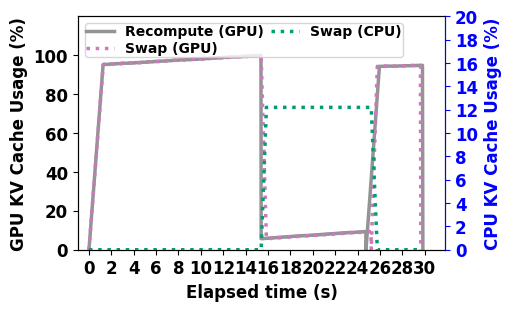

In [5]:
# EV2: How does evicted tokens impact the throughput and KV Cache Usage over time? (select 16K)
###### Plot for recomp/swap avg throughput (tokens/s) and GPU/CPU KV cache usage (%) over time ######
def plot_recmp_swap_for_evicted_tokens(data_recmp, data_swap, x_tag, y1_tag, y2_tag, output_name):
    fig, ax1 = plt.subplots(figsize=(5, 3), constrained_layout=True)
    # Plot the recompute and swap throughput on left y-axis
    ax1.plot(data_recmp[x_tag], data_recmp[y1_tag], color=recmp_swap_util_colors1[0], linewidth=2, label='Recompute (GPU)')
    ax1.plot(data_swap[x_tag], data_swap[y1_tag], color=recmp_swap_util_colors1[1], linestyle=":", linewidth=1, label='Swap (GPU)')

    ax2 = ax1.twinx()
    ax2.plot(data_swap[x_tag], data_swap[y2_tag], color=recmp_swap_util_colors1[2], linestyle=":", linewidth=1, label='Swap (CPU)')

    ax1.set_ylim(0, 120)  # outliers only
    ax1.set_yticks(range(0, 120, 20))  # most of the data

    ax2.set_ylim(0, 20)  # outliers only
    ax2.set_yticks(range(0, 21, 2))  # most of the data
    ax2.tick_params(axis='y', color='blue', labelcolor='blue')
    ax2.spines['right'].set_color('blue')

    ax1.set_xlim(-1, max(data_swap[x_tag].max(), data_recmp[x_tag].max()) + 2)
    ax1.set_xticks(range(0, int(max(data_swap[x_tag].max(), data_recmp[x_tag].max()) + 2), 2))

    ax1.set_ylabel('GPU KV Cache Usage (%)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('CPU KV Cache Usage (%)', fontsize=12, fontweight='bold', color='blue')
    ax1.set_xlabel('Elapsed time (s)', fontsize=12, fontweight='bold')

    linewidth=2.5
    lines1, labels1 = ax1.get_legend_handles_labels()
    for line in lines1:
        line.set_linewidth(linewidth)
    lines2, labels2 = ax2.get_legend_handles_labels()
    for line in lines2:
        line.set_linewidth(linewidth)

    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', ncol=2, borderpad=0.1, 
            labelspacing=0.2, columnspacing=0.5, frameon=True, fontsize=10)

    plt.savefig(f"{output_name}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_name}.png", format='png', bbox_inches='tight')
    plt.show()


output_name = f'{base_plots_path}/swap-recmp-util-q4a-16k'
filename_swap = f'{base_data_path}/Q4_a_16k/swap_Q4a_16k'
filename_recmp = f'{base_data_path}/Q4_a_16k/recmp_Q4a_16k'
x_tag = 'Time elapsed (ms)'
y1_tag = 'GPU KV cache usage (%)'
y2_tag = 'CPU KV cache usage (%)'
data_swap = pd.read_csv(f'{filename_swap}.csv')
data_recmp = pd.read_csv(f'{filename_recmp}.csv')
# process timestamp from ms to seconds
data_swap[x_tag] = data_swap[x_tag] / 1000
data_recmp[x_tag] = data_recmp[x_tag] / 1000

plot_recmp_swap_for_evicted_tokens(data_recmp, data_swap, x_tag, y1_tag, y2_tag, output_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


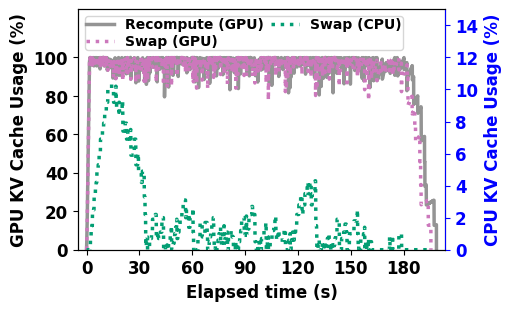

In [6]:
# EV2: How does different models impact the throughput and KV Cache Usage over time? (select OPT models)
###### Plot for recomp/swap GPU/CPU KV cache usage (%) over time ######
def plot_recmp_swap_for_models(data_recmp, data_swap, x_tag, y1_tag, y2_tag, output_name, model_name):
    fig, ax1 = plt.subplots(figsize=(5, 3), constrained_layout=True)
    # Plot the recompute and swap throughput on left y-axis
    ax1.plot(data_recmp[x_tag], data_recmp[y1_tag], color=recmp_swap_util_colors1[0], linewidth=0.5, label='Recompute (GPU)')
    ax1.plot(data_swap[x_tag], data_swap[y1_tag], color=recmp_swap_util_colors1[1], linestyle=":", linewidth=0.5, label='Swap (GPU)')

    ax2 = ax1.twinx()
    ax2.plot(data_swap[x_tag], data_swap[y2_tag], color=recmp_swap_util_colors1[2], linestyle=":", linewidth=0.5, label='Swap (CPU)')

    ax1.set_ylim(0, 125)  # outliers only
    ax1.set_yticks(range(0, 120, 20))  # most of the data

    ax2.set_ylim(0, 15)  # outliers only
    ax2.set_yticks(range(0, 15, 2))  # most of the data
    ax2.tick_params(axis='y', color='blue', labelcolor='blue')
    ax2.spines['right'].set_color('blue')

    if model_name == 'OPT13B':
        ax1.set_xlim(-5, max(data_swap[x_tag].max(), data_recmp[x_tag].max()) + 5)
        ax1.set_xticks(range(0, int(max(data_swap[x_tag].max(), data_recmp[x_tag].max()) + 5), 30))
    else:
        ax1.set_xlim(-1, max(data_swap[x_tag].max(), data_recmp[x_tag].max()) + 2)
        ax1.set_xticks(range(0, int(max(data_swap[x_tag].max(), data_recmp[x_tag].max()) + 5), 10))

    ax1.set_ylabel('GPU KV Cache Usage (%)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('CPU KV Cache Usage (%)', fontsize=12, fontweight='bold', color='blue')
    ax1.set_xlabel('Elapsed time (s)', fontsize=12, fontweight='bold')

    linewidth=2.5
    lines1, labels1 = ax1.get_legend_handles_labels()
    for line in lines1:
        line.set_linewidth(linewidth)
    lines2, labels2 = ax2.get_legend_handles_labels()
    for line in lines2:
        line.set_linewidth(linewidth)

    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', ncol=2, borderpad=0.1, 
            labelspacing=0.2, columnspacing=0.5, frameon=True, fontsize=10)

    plt.savefig(f"{output_name}.eps", format='eps', bbox_inches='tight')
    plt.savefig(f"{output_name}.png", format='png', bbox_inches='tight')
    plt.show()


output_name = f'{base_plots_path}/swap-recmp-util-q4-opt13b'
filename_swap = f'{base_data_path}/Q4_diff_models/swap_Q4f__OPT13B'
filename_recmp = f'{base_data_path}/Q4_diff_models/recmp_Q4f__OPT13B'
x_tag = 'Time elapsed (ms)'
y1_tag = 'GPU KV cache usage (%)'
y2_tag = 'CPU KV cache usage (%)'
data_swap = pd.read_csv(f'{filename_swap}.csv')
data_recmp = pd.read_csv(f'{filename_recmp}.csv')
# process timestamp from ms to seconds
data_swap[x_tag] = data_swap[x_tag] / 1000
data_recmp[x_tag] = data_recmp[x_tag] / 1000

plot_recmp_swap_for_models(data_recmp, data_swap, x_tag, y1_tag, y2_tag, output_name, 'OPT13B')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


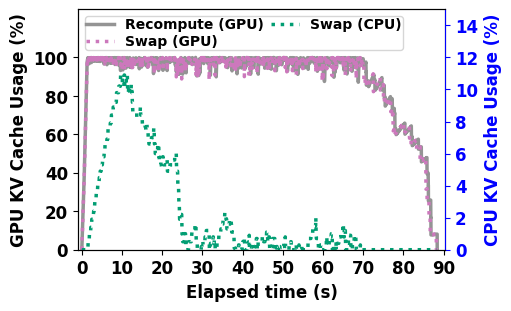

In [7]:
output_name = f'{base_plots_path}/swap-recmp-util-q4-llama2-7B'
filename_swap = f'{base_data_path}/Q4_diff_models/swap_Q4f__llama2-7B'
filename_recmp = f'{base_data_path}/Q4_diff_models/recmp_Q4f__llama2-7B'
x_tag = 'Time elapsed (ms)'
y1_tag = 'GPU KV cache usage (%)'
y2_tag = 'CPU KV cache usage (%)'
data_swap = pd.read_csv(f'{filename_swap}.csv')
data_recmp = pd.read_csv(f'{filename_recmp}.csv')
# process timestamp from ms to seconds
data_swap[x_tag] = data_swap[x_tag] / 1000
data_recmp[x_tag] = data_recmp[x_tag] / 1000

plot_recmp_swap_for_models(data_recmp, data_swap, x_tag, y1_tag, y2_tag, output_name, 'llama2-7B')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


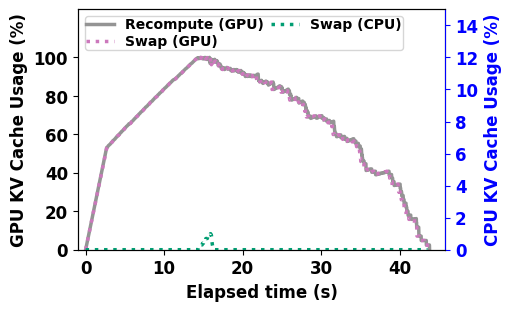

In [8]:
output_name = f'{base_plots_path}/swap-recmp-util-q4-llama3-8B'
filename_swap = f'{base_data_path}/Q4_diff_models/swap_Q4f__llama3-8B'
filename_recmp = f'{base_data_path}/Q4_diff_models/recmp_Q4f__llama3-8B'
x_tag = 'Time elapsed (ms)'
y1_tag = 'GPU KV cache usage (%)'
y2_tag = 'CPU KV cache usage (%)'
data_swap = pd.read_csv(f'{filename_swap}.csv')
data_recmp = pd.read_csv(f'{filename_recmp}.csv')
# process timestamp from ms to seconds
data_swap[x_tag] = data_swap[x_tag] / 1000
data_recmp[x_tag] = data_recmp[x_tag] / 1000

plot_recmp_swap_for_models(data_recmp, data_swap, x_tag, y1_tag, y2_tag, output_name, 'llama3-8B')